# 9000+ Movies Dataset EDA

- #### about data:
    - dataset includes information about 9000+ movies.
- #### columns:
    - `Release_Date`: Date when the movie was released.
    - `Title`: Name of the movie.
    - `Overview`: Brief summary of the movie.
    - `Popularity`: It is a very important metric computed by **TMDB** developers based on the number of **views per day**, **votes per day**, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
    - `Vote_Count`: Total votes received from the viewers.
    - `Vote_Average`: Average rating based on vote count and the number of viewers out of 10.
    - `Original_Language`: Original language of the movies. Dubbed version is not considered to be original language.
    - `Genre`: Categories the movie it can be classified as.
    - `Poster_Url`: Url of the movie poster.

- **[Exploring](#Exploring)** <br>
- **[Cleaning](#Cleaning)**<br>
- **[EDA](#EDA)**
     - In What year were most movies made ?
     - In What month were most movies made ?
     - Most movies were in what language ?
     - What's the highest voted movies ?
     - What's the most popular movies ?
     - What genre is the most frequent in the dataset?
     - Most popular movies in frequent genres
     
     

### Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/mymoviedb.csv',  lineterminator='\n')
df.shape

(9827, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
nans = df.isna().sum().sort_values(ascending = False)
pct = (nans/df.shape[0]) * 100
pd.concat([nans, pct], axis = 1).rename(columns = {0 : 'NullValuesCount', 1 : 'NullValuesPercentage'}).head(5)

,NullValuesCount,NullValuesPercentage
Release_Date,0,0.0
Title,0,0.0
Overview,0,0.0
Popularity,0,0.0
Vote_Count,0,0.0


In [8]:
df[['Genre']].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [9]:
df['Original_Language'].value_counts()

en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: Original_Language, dtype: int64

#### Conclusion
- There is no missing values
- `'Release_Date'` column needs to be parsed to date-time series, from which I'll extract `'Release_Year'` and `'Release_Month'`
- `'Popularity'` column is too skewed so I'll cut it into categories
- `'Genre'` colum needs to be split into multiple columns 
- `'Original_Language'` column has too many unique values so I'll group languages with count less than 80 into one category `'other'`
- columns `'Poster_Url', 'Overview'` won't be helpful for the analysis so I'll drop them

### Cleaning

1. `'Release_Date'`

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df[['Release_Date']].head(5)

,Release_Date
0,2021-12-15
1,2022-03-01
2,2022-02-25
3,2021-11-24
4,2021-12-22


In [11]:
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Month'] = df['Release_Date'].dt.month_name()
df[['Release_Date', 'Release_Year', 'Release_Month']]

,Release_Date,Release_Year,Release_Month
0,2021-12-15,2021,December
1,2022-03-01,2022,March
2,2022-02-25,2022,February
3,2021-11-24,2021,November
4,2021-12-22,2021,December
...,...,...,...
9822,1973-10-15,1973,October
9823,2020-10-01,2020,October
9824,2016-05-06,2016,May
9825,2021-03-31,2021,March


2. `'Popularity'`

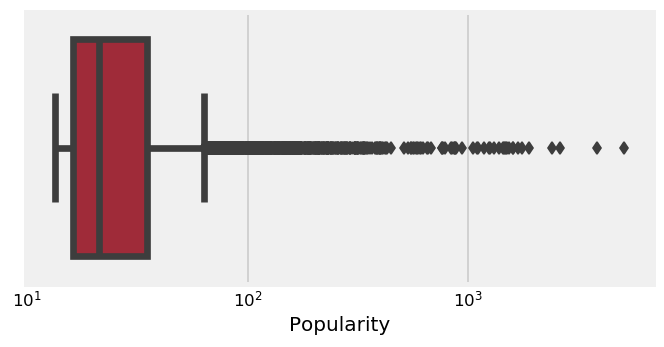

In [12]:
fig, ax = plt.subplots(figsize = (6,3), dpi = 120)

sns.boxplot(x = 'Popularity', data = df, color = '#b2182b')

plt.xscale('log')
plt.show()

In [13]:
very_pop = df['Popularity'] >= 1000
pop = (100 <= df['Popularity']) & ( df['Popularity'] < 1000)
not_pop = (40 < df['Popularity']) & ( df['Popularity'] < 100)
not_known = df['Popularity'] < 40


print(f'count of very popular movies : {very_pop.sum()}')
print(f'count of popular movies : {pop.sum()}')
print(f'count of not popular movies : {not_pop.sum()}')
print(f'count of not known movies : {not_known.sum()}')

count of very popular movies : 23
count of popular movies : 526
count of not popular movies : 1495
count of not known movies : 7783


In [14]:
df['Popularity_Cat'] = pd.cut(df['Popularity']
                              , bins = [0, 40, 100, 1000, np.inf]
                              , labels = ['Not Known', 'Not Poplur', 'Popular', 'Very Popular'])

df[['Popularity', 'Popularity_Cat']].head(5)

,Popularity,Popularity_Cat
0,5083.954,Very Popular
1,3827.658,Very Popular
2,2618.087,Very Popular
3,2402.201,Very Popular
4,1895.511,Very Popular


3. `'Genre'`

In [15]:
genres_df = df['Genre'].str.strip().str.split(',', expand = True)
genres_df

,0,1,2,3,4,5,6,7
0,Action,Adventure,Science Fiction,None,None,None,None,None
1,Crime,Mystery,Thriller,None,None,None,None,None
2,Thriller,None,None,None,None,None,None,None
3,Animation,Comedy,Family,Fantasy,None,None,None,None
4,Action,Adventure,Thriller,War,None,None,None,None
...,...,...,...,...,...,...,...,...
9822,Drama,Crime,None,None,None,None,None,None
9823,Horror,None,None,None,None,None,None,None
9824,Mystery,Thriller,Horror,None,None,None,None,None
9825,Music,Drama,History,None,None,None,None,None


In [16]:
Genres = ['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8']
df[Genres] = genres_df
df[Genres].head()

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8
0,Action,Adventure,Science Fiction,None,None,None,None,None
1,Crime,Mystery,Thriller,None,None,None,None,None
2,Thriller,None,None,None,None,None,None,None
3,Animation,Comedy,Family,Fantasy,None,None,None,None
4,Action,Adventure,Thriller,War,None,None,None,None


4. `'Original_Language'`

In [17]:
langs_freq = df['Original_Language'].value_counts()
langs_freq[langs_freq < 80]

pt    37
da    28
no    26
hi    26
sv    23
nl    21
pl    17
th    17
id    15
tr    15
tl     8
te     6
el     5
fi     5
sr     5
cs     4
fa     3
hu     3
is     2
ro     2
uk     2
ta     2
ar     2
he     2
ca     1
la     1
nb     1
bn     1
ms     1
lv     1
eu     1
ml     1
et     1
Name: Original_Language, dtype: int64

In [18]:
langs_to_group = list(langs_freq[langs_freq < 80].index)

filt = df['Original_Language'].isin(langs_to_group)
df.loc[filt, 'Original_Language'] = 'Other'

df.loc[filt, 'Original_Language'].head(5)

18     Other
67     Other
79     Other
95     Other
121    Other
Name: Original_Language, dtype: object

5. drop useless columns

In [19]:
df.drop(['Poster_Url', 'Overview'], axis = 1, inplace = True)
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year,Release_Month,Popularity_Cat,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021,December,Very Popular,Action,Adventure,Science Fiction,None,None,None,None,None
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022,March,Very Popular,Crime,Mystery,Thriller,None,None,None,None,None
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller,2022,February,Very Popular,Thriller,None,None,None,None,None,None,None
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021,November,Very Popular,Animation,Comedy,Family,Fantasy,None,None,None,None
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021,December,Very Popular,Action,Adventure,Thriller,War,None,None,None,None


### EDA
- #### In What year were most movies made ?

In year 2021, 714 movies were released


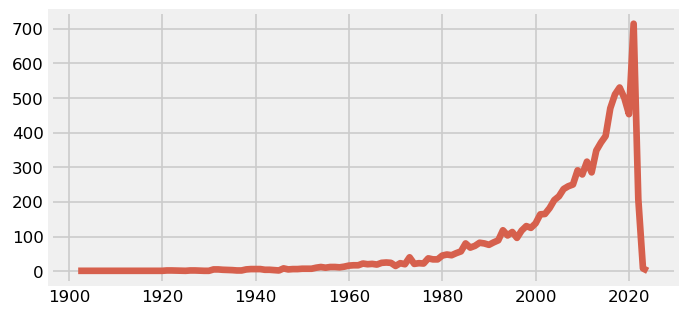

In [20]:
fig, ax = plt.subplots(figsize = (6, 3), dpi = 120)
to_plot = df['Release_Year'].value_counts().sort_index()

sns.lineplot(x = to_plot.index, y = to_plot.values, color = '#d6604d')
print(f'In year 2021, {to_plot[2021]} movies were released')
plt.show()

        The Year 2021 was the year in which most movies were released
<br>
<br>

- #### In What month were most movies released ?
<br>
To Answer this I'll resample the dataframe by month then calculate the median number of movies made in each month

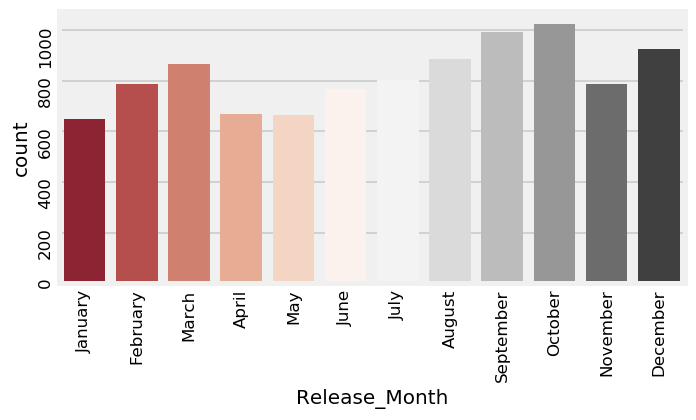

In [21]:
fig, ax = plt.subplots(figsize = (6, 3), dpi = 120)

sns.countplot(x = 'Release_Month', data = df, palette = 'RdGy',
             order = ['January','February','March','April','May',
                      'June','July','August','September','October','November','December'])

ax.tick_params(labelrotation=90)
plt.show()

        October is the month in which most movies were released


- #### Most movies were in what language ?

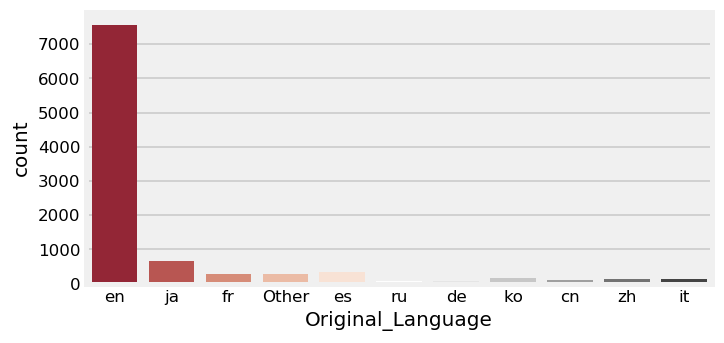

In [22]:
fig, ax = plt.subplots(figsize = (6, 3), dpi = 120)

sns.countplot(x = 'Original_Language', data = df, palette = 'RdGy')

plt.show()

- #### What's the highest voted movies ?

In [23]:
df[['Title', 'Vote_Count','Vote_Average']].sort_values(by = ['Vote_Count', 'Vote_Average'], ascending = [False, False]).head(30)

,Title,Vote_Count,Vote_Average
380,Inception,31077,8.4
461,Interstellar,27975,8.4
221,The Dark Knight,26994,8.5
138,The Avengers,26490,7.7
195,Deadpool,26390,7.6
92,Avatar,25011,7.5
71,Avengers: Infinity War,24079,8.3
1223,Guardians of the Galaxy,24024,7.9
407,Fight Club,23620,8.4
1312,Pulp Fiction,22733,8.5


In [24]:
df['count_norm_x_average'] = (df['Vote_Count']/df['Vote_Count'].max()) * df['Vote_Average']
top_30 = df[['Title', 'Vote_Count','Vote_Average', 'count_norm_x_average']].sort_values(by = ['count_norm_x_average'],
                                                                               ascending = [False]).head(30)
top_30.index = range(30)
top_30

,Title,Vote_Count,Vote_Average,count_norm_x_average
0,Inception,31077,8.4,8.400000
1,Interstellar,27975,8.4,7.561541
2,The Dark Knight,26994,8.5,7.383242
3,The Avengers,26490,7.7,6.563471
4,Deadpool,26390,7.6,6.453776
5,Avengers: Infinity War,24079,8.3,6.430984
6,Fight Club,23620,8.4,6.384400
7,Pulp Fiction,22733,8.5,6.217798
8,Guardians of the Galaxy,24024,7.9,6.107076
9,Forrest Gump,22308,8.5,6.101554


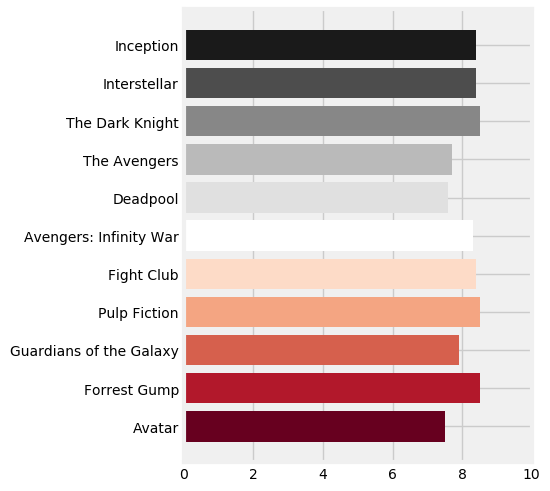

In [25]:
fig, ax = plt.subplots(figsize = (4, 6), dpi = 100)

to_plot =  top_30.loc[:10, ['Vote_Average', 'Title', 'count_norm_x_average']].sort_values(by = 'count_norm_x_average')
colors = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#ffffff','#e0e0e0','#bababa','#878787','#4d4d4d','#1a1a1a']
ax.barh(width =to_plot['Vote_Average'], y = to_plot['Title'], color = colors)

ax.set_xlim([0,10])
plt.show()

- #### What's the most popular movies ?

In [26]:
filt = df['Popularity_Cat'] == 'Very Popular'
df.loc[filt, ['Title', 'Popularity', 'Popularity_Cat']]

,Title,Popularity,Popularity_Cat
0,Spider-Man: No Way Home,5083.954,Very Popular
1,The Batman,3827.658,Very Popular
2,No Exit,2618.087,Very Popular
3,Encanto,2402.201,Very Popular
4,The King's Man,1895.511,Very Popular
5,The Commando,1750.484,Very Popular
6,Scream,1675.161,Very Popular
7,Kimi,1601.782,Very Popular
8,Fistful of Vengeance,1594.013,Very Popular
9,Eternals,1537.406,Very Popular


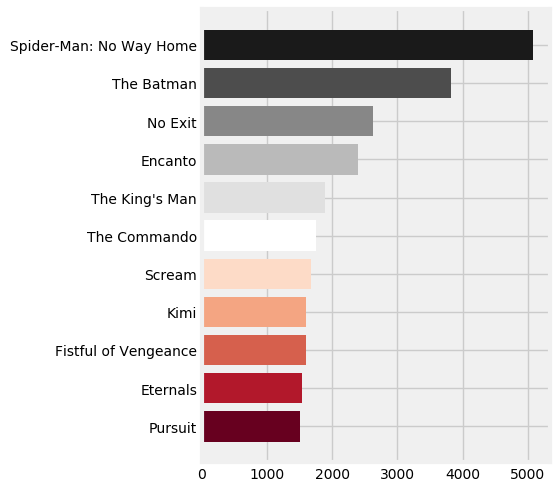

In [27]:
fig, ax = plt.subplots(figsize = (4, 6), dpi = 100)

to_plot =  df.loc[filt, ['Title', 'Popularity', 'Popularity_Cat']].sort_values(by = 'Popularity', ascending  = False)
ax.barh(width =to_plot.iloc[10::-1]['Popularity'], y = to_plot.iloc[10::-1]['Title'], color = colors)

plt.show()

In [28]:
df[Genres]

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8
0,Action,Adventure,Science Fiction,None,None,None,None,None
1,Crime,Mystery,Thriller,None,None,None,None,None
2,Thriller,None,None,None,None,None,None,None
3,Animation,Comedy,Family,Fantasy,None,None,None,None
4,Action,Adventure,Thriller,War,None,None,None,None
...,...,...,...,...,...,...,...,...
9822,Drama,Crime,None,None,None,None,None,None
9823,Horror,None,None,None,None,None,None,None
9824,Mystery,Thriller,Horror,None,None,None,None,None
9825,Music,Drama,History,None,None,None,None,None


In [29]:
df['Genre'] = df['Genre'].str.strip().str.split(',')

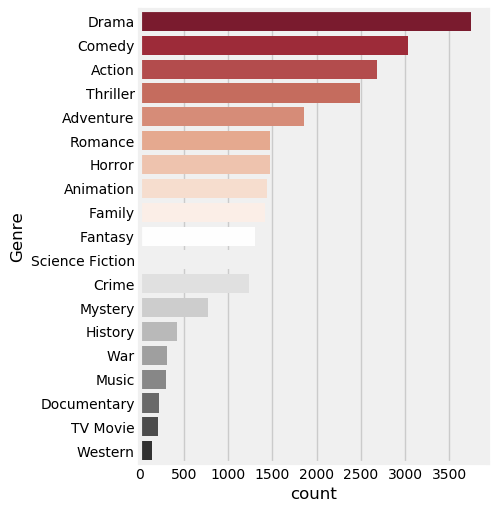

In [30]:
fig, ax = plt.subplots(figsize = (4, 6), dpi = 100)
new_df = df.explode('Genre')
new_df['Genre'] = new_df['Genre'].str.strip()
sns.countplot(y = 'Genre', data = new_df,order = new_df['Genre'].value_counts().index, palette = 'RdGy')

plt.show()


- #### Most popular movies in `'Drama'` genre

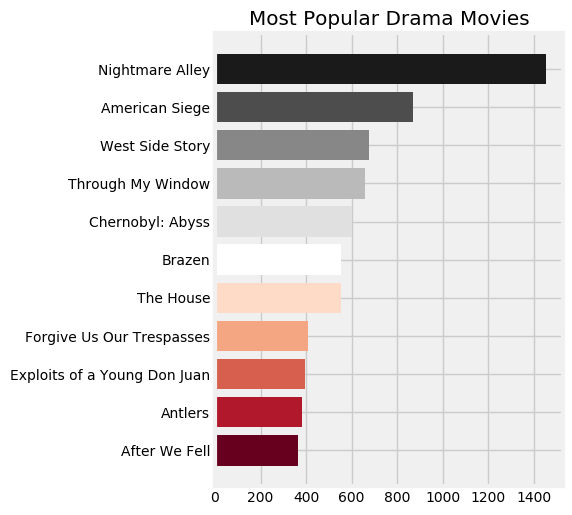

In [31]:
fig, ax = plt.subplots( figsize = (4, 6), dpi = 100)

filt = new_df['Genre'] == 'Drama'
new_df.loc[filt, ['Title', 'Popularity']]
to_plot =  new_df.loc[filt, ['Title', 'Popularity']].sort_values(by = 'Popularity', ascending  = False)
ax.barh(width =to_plot.iloc[10::-1]['Popularity'], y = to_plot.iloc[10::-1]['Title'], color = colors)
ax.set_title('Most Popular Drama Movies')


plt.show()

- #### Most popular movies in `'Comedy'` genre

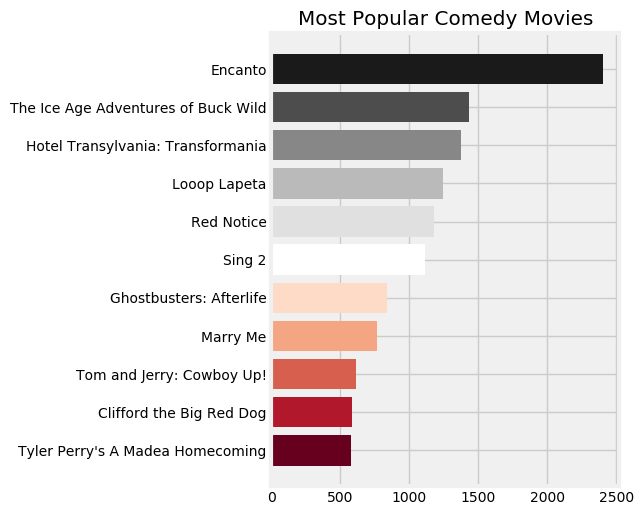

In [32]:
fig, ax = plt.subplots( figsize = (4, 6), dpi = 100)

filt = new_df['Genre'] == 'Comedy'
new_df.loc[filt, ['Title', 'Popularity']]
to_plot =  new_df.loc[filt, ['Title', 'Popularity']].sort_values(by = 'Popularity', ascending  = False)
ax.barh(width =to_plot.iloc[10::-1]['Popularity'], y = to_plot.iloc[10::-1]['Title'], color = colors)
ax.set_title('Most Popular Comedy Movies')

plt.show()